In [103]:
import warnings
warnings.filterwarnings(action='ignore')
from pandas import read_csv,merge,concat,melt, read_excel
import sys
import seaborn as sb
from matplotlib import pyplot as plt

In [104]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.unicode_minus'] = False

In [105]:
origin = read_csv('../../파일/한열/임시데이터/19년도.csv',encoding='euc-kr')
origin1 = read_csv('../../파일/한열/임시데이터/20년도.csv',encoding='euc-kr')
origin2 = read_csv('../../파일/한열/임시데이터/21년도.csv',encoding='euc-kr')
dataf = read_csv('../../파일/한열/임시데이터/내국인관광지입장객수.csv',encoding='euc-kr')
dataf1 = read_csv('../../파일/한열/임시데이터/외국인관광지입장객수.csv',encoding='euc-kr')

In [106]:
mapping = {'국립제주박물관' : 50110107, '도립미술관':50110137,'만장굴관광지':50110256,'민속자연사박물관':50110102,'비자림':50110256,'삼양선사유적지':50110114,'절물자연휴양림':50110116,'제주도립 김창열미술관':50110250,'제주돌문화공원':50110259,'제주목관아지':50110106,'제주별빛누리공원':50110134,'제주항일기념관':50110259,'한라산국립공원':50110134,'항몽 유적지':50110253,'해녀 박물관':50110256,'감귤박물관':50130109,'기당미술관':50130106,'마라해양도립공원' : 50130250, '박물관은살아있다' : 50130119, 
 '산방산' : 50130310, '서귀포도립해양공원' : 50130106, 
 '서귀포자연휴양림' : 50130118, '서복전시관' : 50130101, 
 '성산일출봉' : 50130259, '이중섭미술관' : 50130101, 
 '일출랜드' : 50130259, '정방폭포' : 50130101, 
 '제주추사관' : 50130250, '중문대포해안주상절리대' : 50130112, 
 '천제연폭포' : 50130112, '천지연폭포' : 50130106, 
 '카멜리아힐' : 50130310, '퍼시픽랜드' : 50130119, 
 '한화아쿠아플라넷제주' : 50130259, '제주현대미술관' : 50110310, 
 '제주국제평화센터' : 50130112}

In [107]:
# 법정동 = read_excel('../../파일/한열/임시데이터/법정동.xlsx')
# 관광지 = read_csv('../../파일/한열/임시데이터/제주관광공사_마을관광지_20220930.csv')

In [108]:
# map_법정동 = dict()
# for i in range(len(법정동)):
#     map_법정동[법정동['법정동명'][i]] = 법정동['행정구역코드'][i]
# map_법정동

In [109]:
# 관광지['코드'] = 관광지['읍면동명'].map(map_법정동)
# 관광지['코드'].isnull().sum()

In [110]:
df_관광지 = read_csv('../../파일/종현/test.csv', encoding='cp949')
df_관광지[['법정동코드','관광지명']].groupby('법정동코드').count()


,관광지명
법정동코드,
50110250,34
50110253,33
50110256,53
50110259,35
50110310,33
50110320,4
50110330,7
50130104,3
50130108,2


In [111]:

dataf['분류'] = dataf['관광지명'].map(mapping)
dataf1['분류'] = dataf['관광지명'].map(mapping)
dataf_all = concat([dataf,dataf1])


In [112]:

dataf_all.query('날짜 >=2019.01')['분류'].unique()

array([50110107., 50110137., 50110256., 50110102., 50110114., 50110116.,
       50110250., 50110259., 50110106., 50110134., 50110253., 50130109.,
       50130106., 50130250., 50130119., 50130310., 50130118., 50130101.,
       50130259., 50130112., 50110310.])

내/외국인 관광지 입장 비율

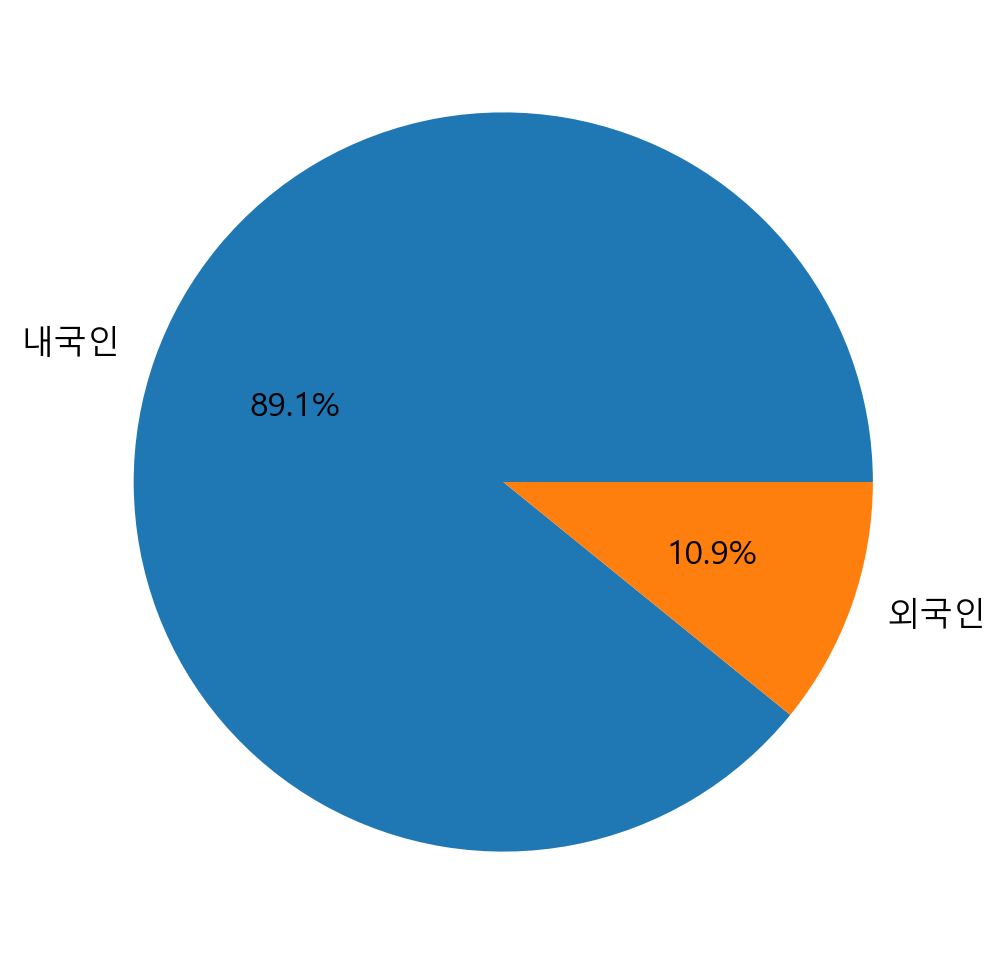

In [113]:
A = dataf['관광객수'].sum()
B = dataf1['관광객수'].sum()
data = [A,B]
labels = ['내국인', '외국인']
plt.figure()
# plt.title("내/외국인 관광지 입장 비율")
plt.pie(data, labels=labels, autopct='%0.1f%%')
plt.show()
plt.close()

In [114]:
dataf1.query('날짜 >= 2019.01')[['분류','관광객수']].groupby(['분류']).sum() # 외국인

,관광객수
분류,
50110102.0,27041
50110106.0,51508
50110107.0,47627
50110114.0,50489
50110116.0,48075
50110134.0,95948
50110137.0,52402
50110250.0,43224
50110253.0,64133


In [115]:
dataf.query('날짜 >= 2019.01')[['분류','관광객수']].groupby(['분류']).sum() #내국인



,관광객수
분류,
50110102.0,583064
50110106.0,322946
50110107.0,790353
50110114.0,95501
50110116.0,2326554
50110134.0,3013134
50110137.0,252933
50110250.0,205167
50110253.0,366279


In [116]:
dataf_all.query('날짜 >= 2019.01')[['분류','관광객수']].groupby(['분류']).sum()

,관광객수
분류,
50110102.0,610105
50110106.0,374454
50110107.0,837980
50110114.0,145990
50110116.0,2374629
50110134.0,3109082
50110137.0,305335
50110250.0,248391
50110253.0,430412


In [117]:
df = concat([origin,origin1,origin2],ignore_index=True)
df['구분']=df['이용자 구분']
df1 = df.query('구분 != "제주도민"').query('구분 != "법인"')
df1

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,데이터기준일자,구분
0,2019-01,서귀포시,도심,신효동,I56114,서양식 음식점업,내국인,단체,50.0,여성,11000,646,음식점업,2020-12-15,내국인
1,2019-01,서귀포시,도심,신효동,I56114,서양식 음식점업,내국인,단체,70.0,여성,60000,646,음식점업,2020-12-15,내국인
2,2019-01,서귀포시,도심,서홍동,I56114,서양식 음식점업,내국인,단체,60.0,여성,68000,646,음식점업,2020-12-15,내국인
3,2019-01,서귀포시,도심,신효동,I56114,서양식 음식점업,내국인,단체,40.0,여성,50000,646,음식점업,2020-12-15,내국인
4,2019-01,서귀포시,도심,월평동,I56114,서양식 음식점업,내국인,개별,50.0,남성,56000,646,음식점업,2020-12-15,내국인
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219068,2021-05,서귀포시,도심,하효동,G47121,슈퍼마켓,내국인,단체,50.0,여성,9100,189,소매업,2021-07-26,내국인
1219070,2021-05,서귀포시,도심,서홍동,G47121,슈퍼마켓,내국인,단체,40.0,남성,10900,189,소매업,2021-07-26,내국인
1219071,2021-05,서귀포시,읍면,남원읍,G47121,슈퍼마켓,내국인,개별,60.0,남성,1106360,189,소매업,2021-07-26,내국인
1219072,2021-05,서귀포시,도심,동홍동,G47121,슈퍼마켓,기타외국,단체,NaN,알수없음,340730,189,소매업,2021-07-26,기타외국


In [118]:
# '''
# 금액을 이용자수로 나눠서 평균을 구한다
# 업종별 금액을 더해서 변화량의 추이를 본다 ( 전년도 대비 등)
# 전체적으로 유사한 변화가 보이는 경우 해당 년도/월에 특이사항이 있었는지 확인한다.
# 한 두개의 튀는 데이터는 해당 업종의 호재/악재가 있었는지 확인한다.


# '''

In [119]:

# 관광 민예품 및 선물용품 소매업 건강보조식품 소매업 화장품 및 방향제 소매업
# 지역별로 이용금액 / 업종

In [120]:


# 카페, 술집, 한식
숙박 = ['여관업', '휴양콘도 운영업', '호텔업'] 
식비 = ['서양식 음식점업', '일식 음식점업','비알콜 음료점업', '피자, 햄버거, 샌드위치 및 유사 음식점업', '기타 외국식 음식점업','한식 음식점업','중식 음식점업', '기타 주점업','체인화 편의점',  '일반유흥 주점업','육류 소매업',
       '그외 기타 종합 소매업','빵 및 과자류 소매업','과실 및 채소 소매업','기타음식료품위주종합소매업', '수산물 소매업']
교통 = ['내항 여객 운송업','자동차 임대업','정기 항공 운송업','차량용 주유소 운영업',  '차량용 가스 충전업','택시 운송업']
기타 = [  '욕탕업', '기타 대형 종합 소매업',   '전시 및 행사 대행업']


서귀포시 = {'신효동':50130109, '서홍동':50130106, '월평동':50130115, '중문동':50130112, '토평동':50130111, '하효동':50130108, '서호동':50130103, '하원동':50130118, '하예동':50130121,
       '서귀동':50130101, '색달동':50130119, '회수동':50130113, '호근동':50130104, '남원읍':50130253, '법환동':50130102, '상예동':50130120, '보목동':50130110, '동홍동':50130105,
       '상효동':50130107, '대포동':50130114, '표선면':50130320, '안덕면':50130310, '강정동':50130116, '성산읍':50130259, '대정읍':50130250, '도순동':50130117, '영남동':50130122}

제주시 = {'조천읍':50110259, '내도동':50110140, '건입동':50110107, '노형동':50110122, '도남동':50110129, '도두일동':50110127, '도두이동':50110128, '도련일동':50110130, '삼도일동':50110105,
       '도평동':50110138, '아라일동':50110117, '아라이동':50110118, '삼양일동':50110113, '삼양이동':50110114, '삼도이동':50110106, '봉개동':50110116, '삼양삼동':50110115, '연동':50110137,
       '추자면':50130250, '한경면':50110310, '한림읍':50110250, '우도면':50110330, '애월읍':50110253, '구좌읍':50110256, '화북일동':50110111, '화북이동':50110112, '해안동':50110139,
       '일도이동':50110102, '일도일동':50110101, '이호이동':50110126, '오등동':50110134, '영평동':50110136, '외도일동':50110123, '오라일동':50110119, '오라삼동':50110121,
       '용담이동':50110109, '오라이동':50110120, '이도이동':50110104, '월평동':50110135, '용담일동':50110108, '이도일동':50110103, '용담삼동':50110110, '이호일동':50110125,
       '외도이동':50110124, '회천동':50110133, '도련이동':50110131, '용강동':50110132}
df1_1=df1.query('시도명 != "서귀포시"')
df1_2=df1.query('시도명 == "서귀포시"')
df1_1['EMD_CD'] = df1_1['읍면동명'].map(제주시)
df1_2['EMD_CD'] = df1_2['읍면동명'].map(서귀포시)
df_emd = concat([df1_1,df1_2]).reset_index(drop=True)
df_emd


,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,데이터기준일자,구분,EMD_CD
0,2019-01,제주시,도심,내도동,G47121,슈퍼마켓,내국인,개별,50.0,여성,215250,456,소매업,2020-12-15,내국인,50110140
1,2019-01,제주시,도심,건입동,G47121,슈퍼마켓,내국인,단체,70.0,여성,1898920,456,소매업,2020-12-15,내국인,50110107
2,2019-01,제주시,도심,건입동,G47121,슈퍼마켓,내국인,단체,40.0,남성,6442440,456,소매업,2020-12-15,내국인,50110107
3,2019-01,제주시,도심,건입동,G47121,슈퍼마켓,내국인,단체,30.0,여성,2947190,456,소매업,2020-12-15,내국인,50110107
4,2019-01,제주시,도심,건입동,G47121,슈퍼마켓,내국인,단체,10.0,남성,3000,456,소매업,2020-12-15,내국인,50110107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716756,2021-05,서귀포시,도심,월평동,G47121,슈퍼마켓,내국인,개별,40.0,남성,14000,189,소매업,2021-07-26,내국인,50130115
716757,2021-05,서귀포시,도심,하효동,G47121,슈퍼마켓,내국인,단체,50.0,여성,9100,189,소매업,2021-07-26,내국인,50130108
716758,2021-05,서귀포시,도심,서홍동,G47121,슈퍼마켓,내국인,단체,40.0,남성,10900,189,소매업,2021-07-26,내국인,50130106
716759,2021-05,서귀포시,읍면,남원읍,G47121,슈퍼마켓,내국인,개별,60.0,남성,1106360,189,소매업,2021-07-26,내국인,50130253


In [121]:
df_emd['분류'] = '기타'
df_emd.loc[df_emd['업종명'] == '여관업','분류'] = '숙박'
df_emd.loc[df_emd['업종명'] == '휴양콘도 운영업','분류'] = '숙박'
df_emd.loc[df_emd['업종명'] == '호텔업','분류'] = '숙박'

df_emd.loc[df_emd['업종명'] == '서양식 음식점업','분류'] = '식비'
df_emd.loc[df_emd['업종명'] == '일식 음식점업','분류'] = '식비'
df_emd.loc[df_emd['업종명'] == '비알콜 음료점업','분류'] = '디저트/주류'
df_emd.loc[df_emd['업종명'] == '피자, 햄버거, 샌드위치 및 유사 음식점업','분류'] = '식비'
df_emd.loc[df_emd['업종명'] == '기타 외국식 음식점업','분류'] = '식비'
df_emd.loc[df_emd['업종명'] == '한식 음식점업','분류'] = '식비'
df_emd.loc[df_emd['업종명'] == '중식 음식점업','분류'] = '식비'
df_emd.loc[df_emd['업종명'] == '기타 주점업','분류'] = '디저트/주류'
df_emd.loc[df_emd['업종명'] == '체인화 편의점','분류'] = '식비'
df_emd.loc[df_emd['업종명'] == '일반유흥 주점업','분류'] = '디저트/주류'
df_emd.loc[df_emd['업종명'] == '육류 소매업','분류'] = '식비'
df_emd.loc[df_emd['업종명'] == '빵 및 과자류 소매업','분류'] = '식비'
df_emd.loc[df_emd['업종명'] == '과실 및 채소 소매업','분류'] = '식비'
df_emd.loc[df_emd['업종명'] == '기타음식료품위주종합소매업','분류'] = '식비'
df_emd.loc[df_emd['업종명'] == '수산물 소매업','분류'] = '식비'

df_emd.loc[df_emd['업종명'] == '내항 여객 운송업','분류'] = '교통'
df_emd.loc[df_emd['업종명'] == '자동차 임대업','분류'] = '교통'
df_emd.loc[df_emd['업종명'] == '정기 항공 운송업','분류'] = '교통'
df_emd.loc[df_emd['업종명'] == '차량용 주유소 운영업','분류'] = '교통'
df_emd.loc[df_emd['업종명'] == '차량용 가스 충전업','분류'] = '교통'
df_emd.loc[df_emd['업종명'] == '택시 운송업','분류'] = '교통'

df_emd.loc[df_emd['업종명'] == '그외 기타 분류안된 오락관련 서비스업','분류'] = '레저'
df_emd.loc[df_emd['업종명'] == '기타 수상오락 서비스업','분류'] = '레저'
df_emd.loc[df_emd['업종명'] == '골프장 운영업','분류'] = '레저'
df_emd.loc[df_emd['업종명'] == '그외 기타 스포츠시설 운영업','분류'] = '레저'
df_emd.loc[df_emd['업종명'] == '마사지업','분류'] = '레저'
df_emd.loc[df_emd['업종명'] == '스포츠 및 레크레이션 용품 임대업','분류'] = '레저'
df_emd.loc[df_emd['업종명'] == '기타 갬블링 및 베팅업','분류'] = '레저'


df_emd.loc[df_emd['업종명'] == '면세점','분류'] = '기념품'
df_emd.loc[df_emd['업종명'] == '관광 민예품 및 선물용품 소매업','분류'] = '기념품'
df_emd.loc[df_emd['업종명'] == '화장품 및 방향제 소매업','분류'] = '기념품'
df_emd.loc[df_emd['업종명'] == '건강보조식품 소매업','분류'] = '기념품'

df_emd.loc[df_emd['업종명'] == '여행사업','분류'] = '여행사업'

df_emd.loc[df_emd['업종명'] == '기타 대형 종합 소매업','분류'] = '기타 대형 종합 소매업'




In [122]:
df_tmp= concat([df_emd.loc[df_emd['업종명'] == '관광 민예품 및 선물용품 소매업',['년월','이용금액','EMD_CD']], df_emd.loc[df_emd['업종명'] == '화장품 및 방향제 소매업',['년월','이용금액','EMD_CD']]])

df_tmp

,년월,이용금액,EMD_CD
13495,2019-01,87500,50110250
13496,2019-01,3114000,50110120
13497,2019-01,484000,50110120
13498,2019-01,1313000,50110120
13499,2019-01,147500,50110137
...,...,...,...
708177,2021-05,18000,50130101
708178,2021-05,199900,50130101
708179,2021-05,346000,50130250
708180,2021-05,35700,50130250


In [123]:
# 년별로 분리해서 QGIS에 넣기

df_골프장 = df_emd.loc[df_emd['업종명'] == '골프장 운영업',['년월','이용금액','EMD_CD']]

df_tmp기념품 = concat([df_emd.loc[df_emd['업종명'] == '관광 민예품 및 선물용품 소매업',['년월','이용금액','EMD_CD']], df_emd.loc[df_emd['업종명'] == '화장품 및 방향제 소매업',['년월','이용금액','EMD_CD']]])
df_기념품 = concat([df_tmp기념품, df_emd.loc[df_emd['업종명'] == '건강보조식품 소매업',['년월','이용금액','EMD_CD']]])

df_tmp숙소 = concat([df_emd.loc[df_emd['업종명'] == '호텔업',['년월','이용금액','EMD_CD']], df_emd.loc[df_emd['업종명'] == '휴양콘도 운영업',['년월','이용금액','EMD_CD']]])
df_숙소 = concat([df_tmp숙소, df_emd.loc[df_emd['업종명'] == '여관업',['년월','이용금액','EMD_CD']]])

In [124]:
df_골프장

,년월,이용금액,EMD_CD
2424,2019-01,3680300,50110250
2432,2019-01,2873200,50110310
2433,2019-01,14926075,50110310
2434,2019-01,6191950,50110310
2435,2019-01,6788850,50110310
...,...,...,...
712745,2021-05,43025410,50130310
712746,2021-05,1620330,50130107
712747,2021-05,13904720,50130253
712748,2021-05,570000,50130253


In [125]:
df_기념품

,년월,이용금액,EMD_CD
13495,2019-01,87500,50110250
13496,2019-01,3114000,50110120
13497,2019-01,484000,50110120
13498,2019-01,1313000,50110120
13499,2019-01,147500,50110137
...,...,...,...
711872,2021-05,213400,50130250
711916,2021-05,3200000,50130104
711917,2021-05,75000,50130116
711918,2021-05,3850000,50130104


In [126]:
df_골프장.reset_index(drop=True,inplace=True)
df_기념품.reset_index(drop=True,inplace=True)
df_숙소.reset_index(drop=True,inplace=True)

df_숙소

,년월,이용금액,EMD_CD
0,2019-01,380000,50110101
1,2019-01,5821394,50110259
2,2019-01,80000,50110253
3,2019-01,431140,50110259
4,2019-01,562740,50110259
...,...,...,...
34234,2021-05,8786909,50130259
34235,2021-05,5895800,50130310
34236,2021-05,18849795,50130101
34237,2021-05,9249960,50130112


In [127]:
# 년 = df_골프장['년월'].copy()
# for i,v in enumerate(년):
#     년[i] = v[:4]
# df_골프장['연'] = 년
# 년 = df_기념품['년월'].copy()
# for i,v in enumerate(년):
#     년[i] = v[:4]
# df_기념품['연'] = 년
# 년 = df_숙소['년월'].copy()
# for i,v in enumerate(년):
#     년[i] = v[:4]
# df_숙소['연'] = 년

# df_골프장.drop('년월',axis=1,inplace=True)
# df_기념품.drop('년월',axis=1,inplace=True)
# df_숙소.drop('년월',axis=1,inplace=True)

In [128]:
df_골프장_tot = df_골프장.drop('년월',axis=1).groupby('EMD_CD').sum().reset_index().rename(columns={'이용금액':'data'}).to_csv('골프장_2019~2021.csv')

df_기념품_tot = df_기념품.drop('년월',axis=1).groupby('EMD_CD').sum().reset_index().rename(columns={'이용금액':'data'}).to_csv('기념품_2019~2021.csv')

df_숙소_tot = df_숙소.drop('년월',axis=1).groupby('EMD_CD').sum().reset_index().rename(columns={'이용금액':'data'}).to_csv('숙소_2019~2021.csv')

In [129]:
df_골프장

,년월,이용금액,EMD_CD
0,2019-01,3680300,50110250
1,2019-01,2873200,50110310
2,2019-01,14926075,50110310
3,2019-01,6191950,50110310
4,2019-01,6788850,50110310
...,...,...,...
5637,2021-05,43025410,50130310
5638,2021-05,1620330,50130107
5639,2021-05,13904720,50130253
5640,2021-05,570000,50130253


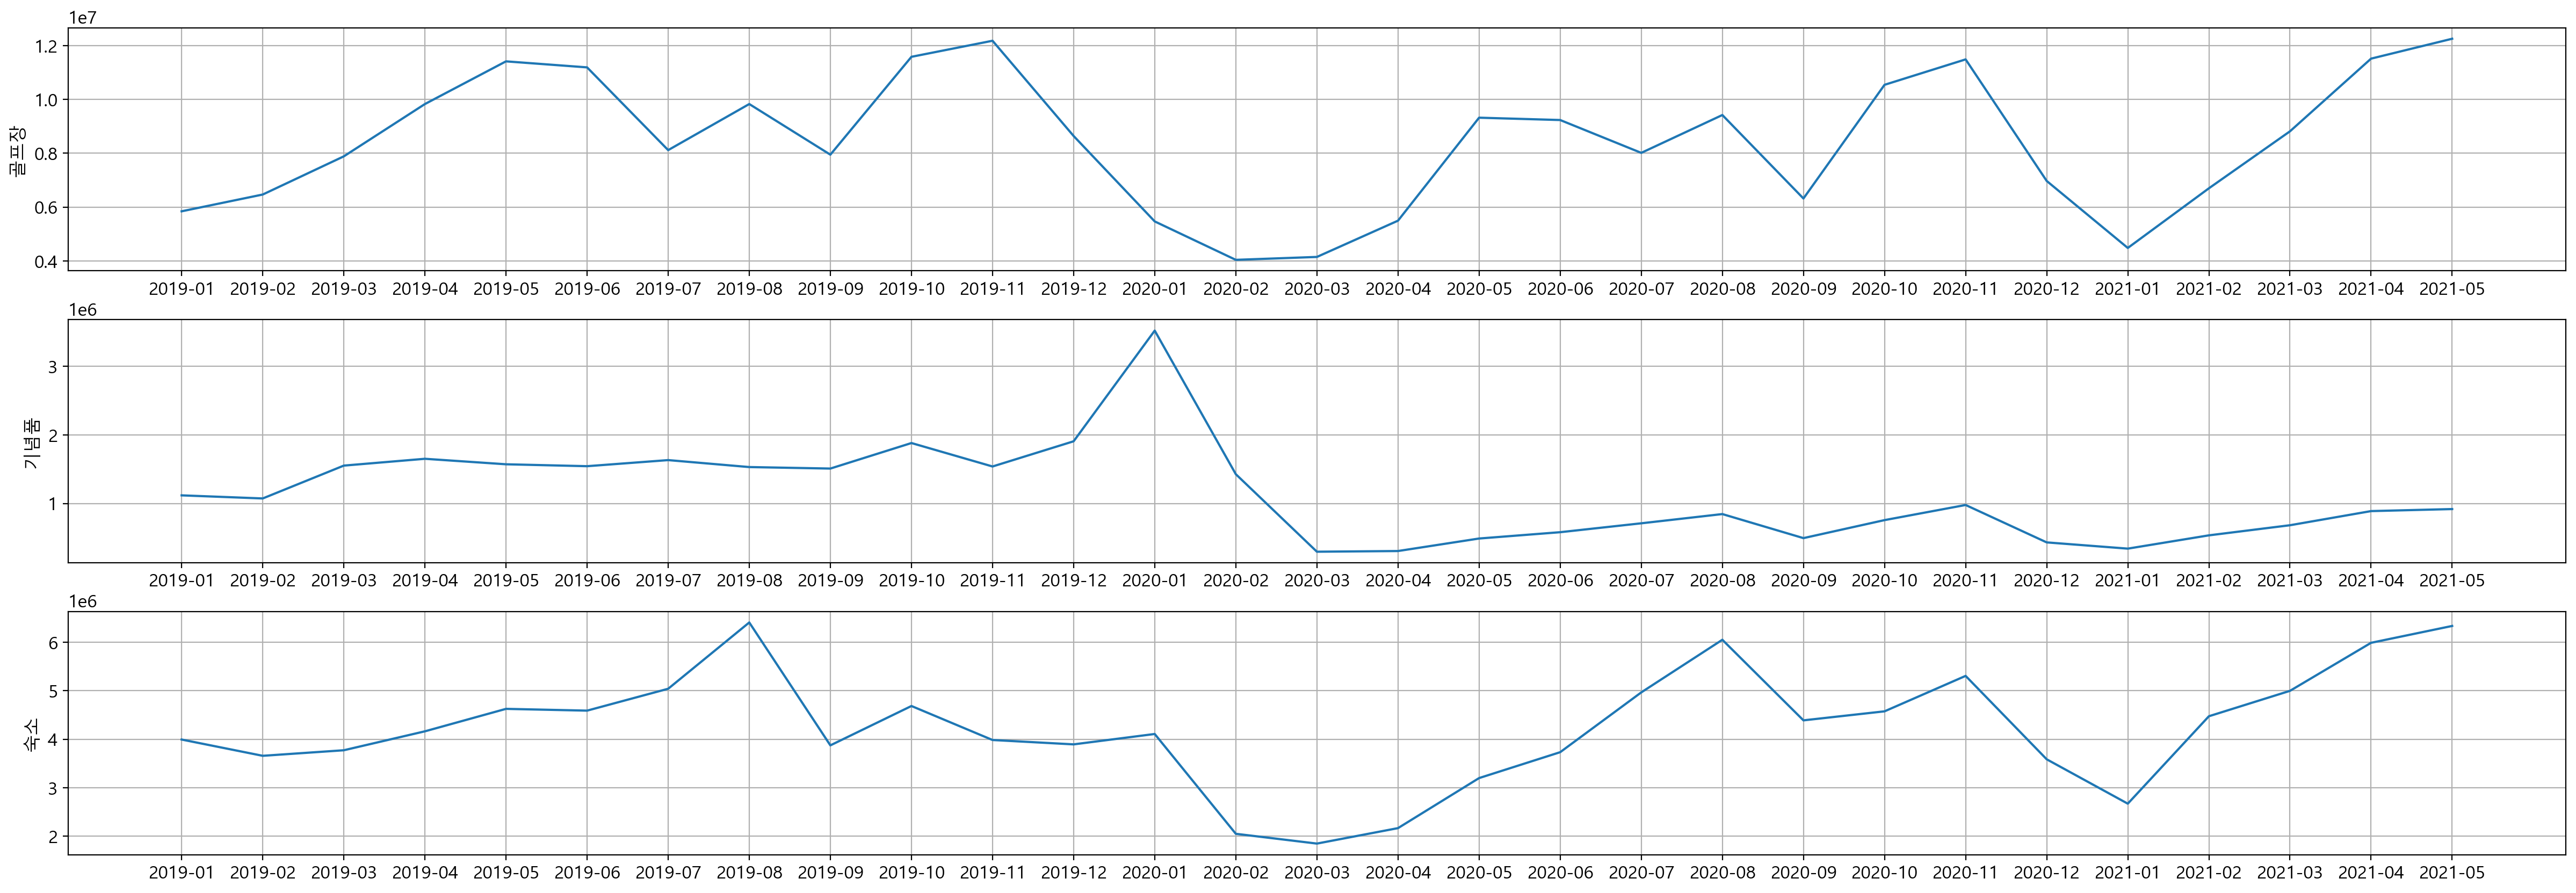

In [132]:
골프장  = melt(df_골프장,  # 미리 일부만 지정
           id_vars = '년월',                      # 유지해야할 변수
           value_vars= '이용금액'    # 재배치하고자 하는 변수
           )
기념품  = melt(df_기념품,  # 미리 일부만 지정
           id_vars = '년월',                      # 유지해야할 변수
           value_vars= '이용금액'    # 재배치하고자 하는 변수
           )
숙소  = melt(df_숙소,  # 미리 일부만 지정
           id_vars = '년월',                      # 유지해야할 변수
           value_vars= '이용금액'    # 재배치하고자 하는 변수
           )
fig , axes = plt.subplots(3,1,figsize=(30,10))
total = [골프장, 기념품, 숙소]
for i,v in enumerate(axes):
    sb.lineplot(data = total[i],x = '년월', y='value',ci=None,ax=v)
    v.grid()
    v.set_xlabel('')
axes[0].set_ylabel('골프장')
axes[1].set_ylabel('기념품')
axes[2].set_ylabel('숙소')
plt.show()
plt.close()

In [131]:
술['value'].max()

NameError: name '술' is not defined